## Resize

/var/folders/z7/_fb_7yss3cz7x3nc0jmhll880000gn/T/ipykernel_71075/2023216848.py:10: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(f"{img_dir}{img_path}.jpg")
/var/folders/z7/_fb_7yss3cz7x3nc0jmhll880000gn/T/ipykernel_71075/2023216848.py:11: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  mask = imageio.imread(f"{label_dir}{img_path}.png")


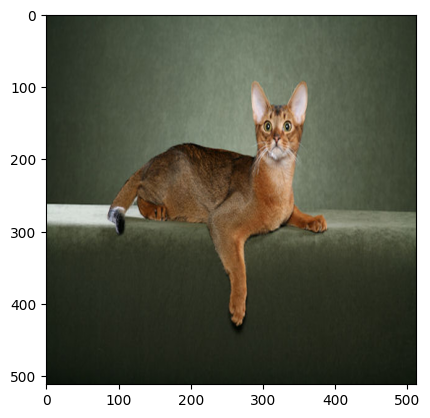

In [ ]:
import imgaug.augmenters as iaa
import imgaug as ia
import imageio
import numpy as np
import matplotlib.pyplot as plt

img_path = "Abyssinian_1"
img_dir = "TrainVal/color/"
label_dir = "TrainVal/label/"
image = imageio.imread(f"{img_dir}{img_path}.jpg")
mask = imageio.imread(f"{label_dir}{img_path}.png")
mask = mask[:,:,0]

# Define augmentation pipeline
im_resize_padding = iaa.Sequential([
    # Step 1: Pad to 1:1 aspect ratio (square) before resizing
    iaa.PadToAspectRatio(
        1.0,                     # Target aspect ratio (width/height)
        position="center",       # Center the image during padding
        pad_mode="constant",     # Pad with black (0) or use "edge"/"reflect"
        pad_cval=0               # Value used for padding
    ),
    # Step 2: Resize to 512x512 (now safe, aspect ratio is 1:1)
    iaa.Resize(
        512
    )
])

im_resize = iaa.Resize(512)

# Define augmentation pipeline
label_resize_padding = iaa.Sequential([
    # Step 1: Pad to 1:1 aspect ratio (square) before resizing
    iaa.PadToAspectRatio(
        1.0,                     # Target aspect ratio (width/height)
        position="center",       # Center the image during padding
        pad_mode="constant",     # Pad with black (0) or use "edge"/"reflect"
        pad_cval=0               # Value used for padding
    ),
    # Step 2: Resize to 512x512 (now safe, aspect ratio is 1:1)
    iaa.Resize(
        512,                     # Target size
        interpolation="nearest"   # For images ("nearest" for masks)
    )
])

label_resize = iaa.Resize(512, interpolation="nearest")



# Apply to image and mask
resized_image = aug.augment_image(image)
resized_mask = aug_mask.augment_image(mask)  # Remove channel dim (back to H, W)

resized_image_2 = resize.augment_image(image)

plt.imshow(resized_image_2)
plt.show()

## Rotation

[  0 128 255]


/var/folders/z7/_fb_7yss3cz7x3nc0jmhll880000gn/T/ipykernel_71075/3279227488.py:9: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(f"{img_dir}{img_path}.jpg")
/var/folders/z7/_fb_7yss3cz7x3nc0jmhll880000gn/T/ipykernel_71075/3279227488.py:10: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  mask = imageio.imread(f"{label_dir}{img_path}.png")


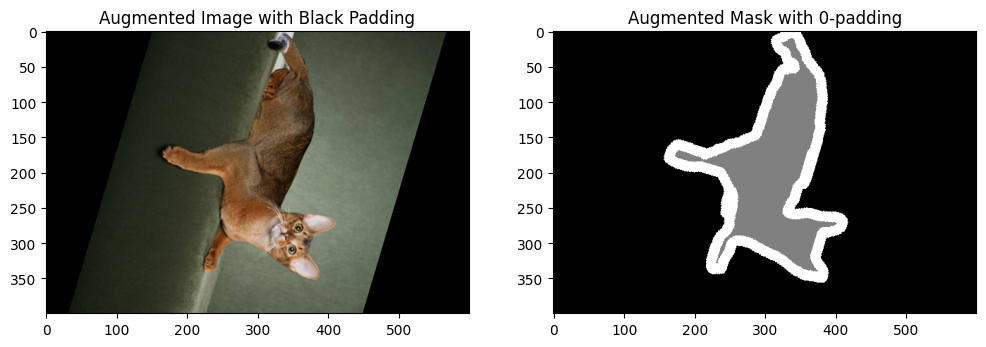

In [ ]:
import imgaug.augmenters as iaa
from imgaug.augmentables.segmaps import SegmentationMapsOnImage

# Convert mask to SegmentationMapsOnImage object
segmap = SegmentationMapsOnImage(mask, shape=image.shape)

# Define augmentation with black padding
aug = iaa.Affine(
    rotate=(45, 270),
    order=3,          # Image interpolation (cubic)
    mode="constant",  # Image padding mode
    cval=0,           # Image padding value (black)
    backend="cv2"
)

# Apply augmentation
augmented_image, augmented_segmap = aug(
    image=image,
    segmentation_maps=segmap
)

# Extract augmented mask
augmented_mask = augmented_segmap.get_arr()

In [63]:
import imgaug.augmenters as iaa
import imgaug.parameters as iap  # Correct import for stochastic parameters
from imgaug.augmentables.segmaps import SegmentationMapsOnImage
import imageio.v3 as iio
import numpy as np
import matplotlib.pyplot as plt
def create_square_crop_augmenter(center_crop=True, seed=None):
    """
    Creates a square crop augmenter that either:
    - Centered crop (largest possible square) when center_crop=True
    - Random positioned crop (size ≥ 2/3 of smallest edge) when center_crop=False
    """
    if center_crop:
        return iaa.CenterCropToAspectRatio(1.0, position='center')
    
    return iaa.CropToAspectRatio(
        aspect_ratio=1.0,
        position='uniform',
        size_percent=iap.Uniform(0.666, 1.0),  # Now using iap
        seed=seed
    )


center_aug = create_square_crop_augmenter(center_crop=True)
random_aug = create_square_crop_augmenter(center_crop=False, seed=42)

# Apply augmentations
center_img, center_mask = center_aug(
    image=image.copy(),
    segmentation_maps=segmap.copy()
)

random_img, random_mask = random_aug(
    image=image.copy(),
    segmentation_maps=segmap.copy()
)

# Extract mask arrays
original_mask = segmap.get_arr()
center_mask = center_mask.get_arr()
random_mask = random_mask.get_arr()

# Visualization
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Original
axes[0,0].imshow(image)
axes[0,0].set_title("Original Image")
axes[1,0].imshow(original_mask, cmap='gray')
axes[1,0].set_title("Original Mask")

# Center Crop
axes[0,1].imshow(center_img)
axes[0,1].set_title("Centered Square Crop")
axes[1,1].imshow(center_mask, cmap='gray')
axes[1,1].set_title("Centered Mask")

# Random Crop
axes[0,2].imshow(random_img)
axes[0,2].set_title("Random Square Crop (≥2/3 size)")
axes[1,2].imshow(random_mask, cmap='gray')
axes[1,2].set_title("Random Crop Mask")

plt.tight_layout()
plt.show()


TypeError: CenterCropToAspectRatio.__init__() got an unexpected keyword argument 'position'